<a href="https://colab.research.google.com/github/EliasHaddad00/MLBostonHousing/blob/master/final_MLBostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2 – End-to-end Machine Learning project

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

*This notebook contains all the sample code and solutions to the exercices in chapter 2.*

# Step 1. Big Picture & Setup (See the slides)

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [ ]:
# Python ≥3.5 is required
#import sys #
# Scikit-Learn ≥0.20 is required
import sklearn # general ml package

# Common imports
import numpy as np # fundamental package for scientific computing
import os # to run file I/O operation 

# to make this notebook's output stable across runs
# any number will do, as long as it is used consistently
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  """Save the selected figure into disc under an image extention and resolution

  Parameters
  ----------
  fig_id : figure handle
    The id number of the figure
  tight_layout : boolean (True or False)
    Specifies whenther the layout should be tight or not
  fig_extension: string
    Under what extension should the file be saved ("png" or "jpg")
  resolution: int
    the quality of the figure (ie. 100,200,300)

  Returns
  -------
  void
    Does not return any value
  """

  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

# Step 2. Get the data

In [ ]:
import tarfile # to support compressed (tar) files
from six.moves import urllib # support URL download

#DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
if not os.path.isdir(HOUSING_PATH):
        os.makedirs(HOUSING_PATH)
'''
Must manaully insert to housing file
'''

'\nMust manaully insert to housing file\n'

In [ ]:
import pandas as pd # Pandas module to enable data manipulation

def load_housing_data(housing_path=HOUSING_PATH):
    """Load Housing Data into Workspace from a CSV"""
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
# Display the first n rows of the data. (n=5 by default, we will use 10 rows)
housing.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B1000(BK0.63)^2,LSTAT%,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [ ]:
# Provide a quick summary of the data including name of features, count, and type
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CRIM             506 non-null    float64
 1   ZN               506 non-null    float64
 2   INDUS            506 non-null    float64
 3   CHAS             506 non-null    int64  
 4   NOX              506 non-null    float64
 5   RM               506 non-null    float64
 6   AGE              506 non-null    float64
 7   DIS              506 non-null    float64
 8   RAD              506 non-null    int64  
 9   TAX              506 non-null    float64
 10  PTRATIO          506 non-null    float64
 11  B1000(BK0.63)^2  506 non-null    float64
 12  LSTAT%           506 non-null    float64
 13  MEDV             506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
# View the counts of each value in the "ocean_proximity" feature
housing["AGE"].value_counts()

100.0    43
96.0      4
98.2      4
95.4      4
97.9      4
         ..
47.6      1
92.7      1
13.9      1
58.4      1
40.1      1
Name: AGE, Length: 356, dtype: int64

In [ ]:
# Provide some basic statistics about the dataset
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B1000(BK0.63)^2,LSTAT%,MEDV
count,506.000000,506.000000,506.00000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.166528,5.93915,0.069170,0.554695,6.284634,68.574901,3.696228,4.332016,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,22.990973,2.75991,0.253994,0.115878,0.702617,28.148861,1.999689,1.417166,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.01000,0.000000,0.385000,3.561000,2.900000,0.585700,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,3.66750,0.000000,0.449000,5.885500,45.025000,2.073700,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.001000,6.41000,0.000000,0.538000,6.208500,77.500000,3.107300,4.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,8.10000,0.000000,0.624000,6.623500,94.075000,5.112625,5.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,95.000000,9.90000,1.000000,0.871000,8.780000,100.000000,9.222900,8.000000,711.000000,22.000000,396.900000,37.970000,50.000000


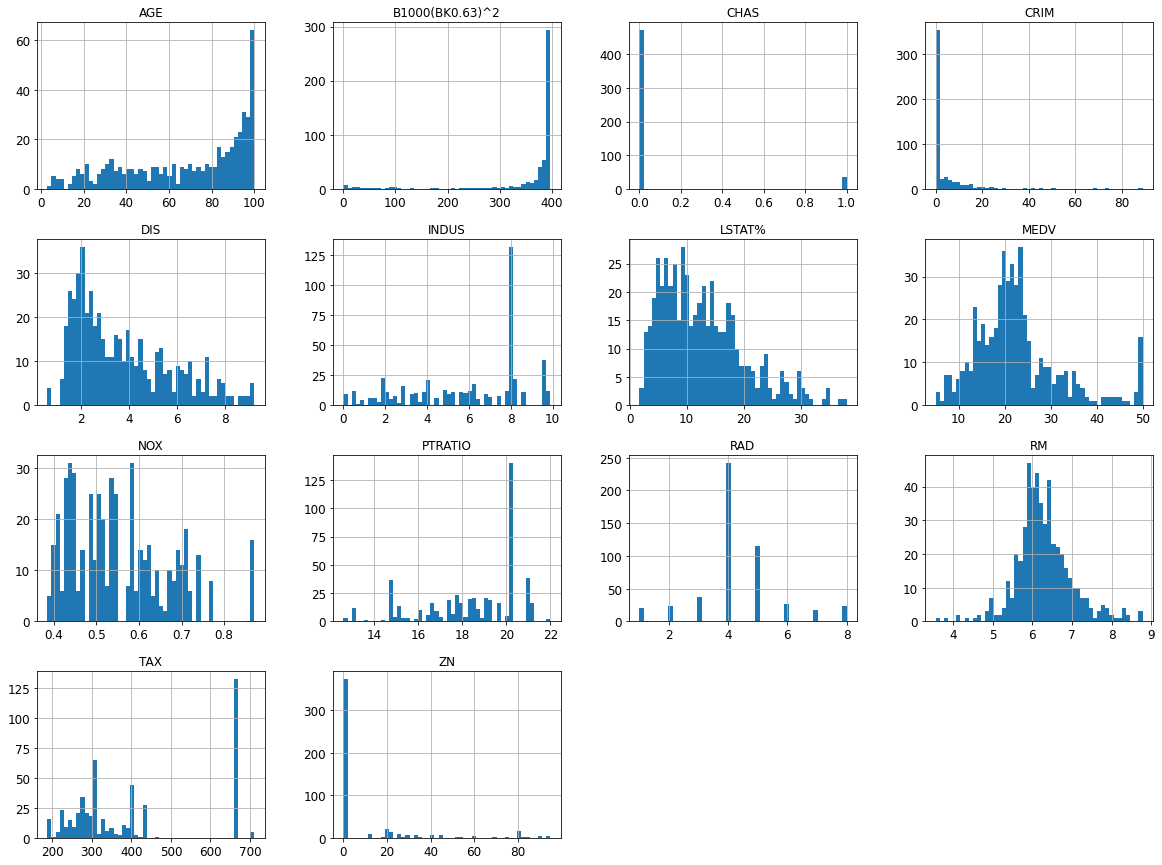

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()
#save_fig("attribute_histogram_plots")


In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into train set (80%) and test set (20%)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:
print( train_set.shape )
print( test_set.shape ) # No peeking at the test data though (data snooping bias)

(404, 14)
(102, 14)


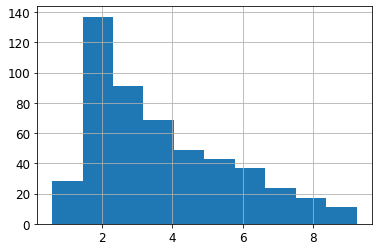

In [ ]:
housing["DIS"].hist()

**A note on the median income:** Per the team that collected the data, the numbers represent roughly tens of thousands of dollars (ie. 4 means \$40,000), and the highest income has been capped at 15 (\$150,000). Working with preprocessed data is common in ML, and it is not neccessarily a problem, we just need to understand how the data was computed.

In [ ]:
# Since this histogram is "tail heavy" (extends much farther to the right from the median and to the left)
# We will try to transform this atrribute to have a more bell-shaped distribution
housing["dis_cat"] = pd.cut(housing["DIS"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [ ]:
housing["dis_cat"].value_counts()

2    212
3    111
5     82
4     68
1     33
Name: dis_cat, dtype: int64

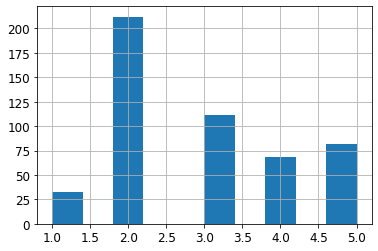

In [ ]:
housing["dis_cat"].hist()

**Stratified Sampling:** So far we only consider random sampling methods. This is generally fine if your dataset is large enough, but if not, you are running a risk of introducing a significant sampling bias. How do we ensure the samples are representative of the whole population. For example, the US population is 51.3% females and 48.7% males, so a well-conducted survey in the US would try to maintain this ratio in the sample: 513 female and 487 male. This is called stratified sampling.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["dis_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

A test set generated by stratified sampling has income category proportions almost identical to those in the full dataset, whether the test set generated by purely random sampling is skewed.

In [ ]:
strat_test_set["dis_cat"].value_counts() / len(strat_test_set)

2    0.421569
3    0.215686
5    0.156863
4    0.137255
1    0.068627
Name: dis_cat, dtype: float64

In [ ]:
housing["dis_cat"].value_counts() / len(housing)

2    0.418972
3    0.219368
5    0.162055
4    0.134387
1    0.065217
Name: dis_cat, dtype: float64

# Step 3. Discover and visualize the data to gain insights

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("dis_cat", axis = 1, inplace=True)

In [ ]:
# Make a copy of the stratified train set
housing = strat_train_set.copy()

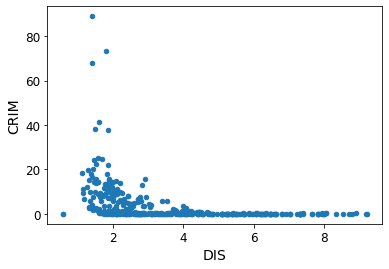

In [ ]:
housing.plot(kind="scatter", x="DIS", y="CRIM")
# save_fig("bad_visualization_plot")

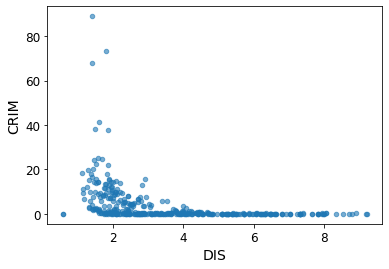

In [ ]:
# Add alpha channel for transparent so that the plot is less crowded.
housing.plot(kind="scatter", x="DIS", y="CRIM", alpha=0.6)
# save_fig("better_visualization_plot")

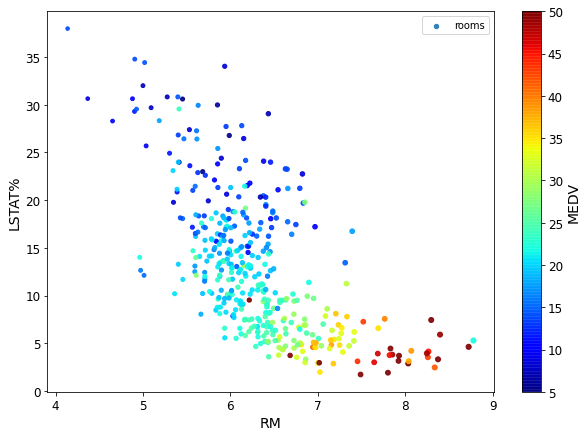

In [ ]:
# Incorporate the population into the circle size
# Add color (jet map) for the value of the housing
housing.plot(kind="scatter", x="RM", y="LSTAT%", alpha=0.9,
    s=housing["RM"]*3, label="rooms", figsize=(10,7),
    c="MEDV", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
# save_fig("housing_prices_scatterplot")

The above image is good enough, but if you want some fancy map, you can have it too!

In [ ]:
# Use corr() to see the correlations (aka Standard Correlation Coefficient or Pearson's r) among the features of the dataset
corr_matrix = housing.corr()
corr_matrix.shape

(14, 14)

**The correlation coefficient** ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north). Finally, coefficients close to zero mean that there is no linear correlation.

![alt text](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)

In [ ]:
# Let's look at how much each feature correlates to the house value 
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV               1.000000
RM                 0.743910
ZN                 0.363011
B1000(BK0.63)^2    0.321857
DIS                0.283044
CHAS               0.199408
RAD                0.152931
INDUS             -0.347237
AGE               -0.380275
CRIM              -0.393907
NOX               -0.450276
TAX               -0.487249
PTRATIO           -0.524798
LSTAT%            -0.743585
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5bfdfcb320>,
      dtype=object)

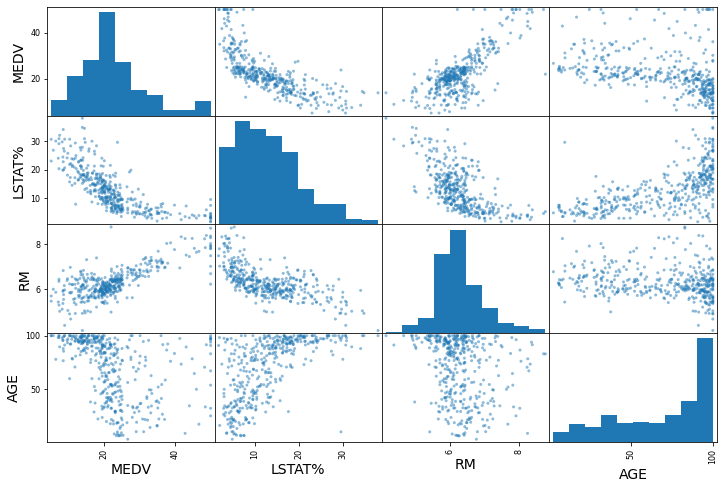

In [ ]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["MEDV", "LSTAT%", "RM",
              "AGE"]
scatter_matrix(housing[attributes], figsize=(12, 8))
# save_fig("scatter_matrix_plot")

(0.0, 40.0, 0.0, 55.0)

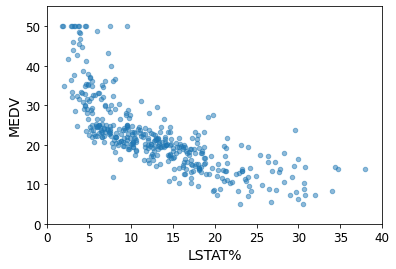

In [ ]:
housing.plot(kind="scatter", x="LSTAT%", y="MEDV",
             alpha=0.5)
plt.axis([0, 40, 0, 55])
# save_fig("income_vs_house_value_scatterplot")

###Feature Engineering: 
Depends on the context of the problem, sometime we can combine some features to create a hopfully better one.

In [ ]:
housing["total_land"] = housing["ZN"]+housing["INDUS"]
housing["cost_per_room"] = housing["MEDV"]/housing["RM"]
housing["tax_percentage"]=(housing["TAX"]/housing["MEDV"])/100
housing.shape

(404, 17)

In [ ]:
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV               1.000000
cost_per_room      0.966046
RM                 0.743910
ZN                 0.363011
total_land         0.337527
B1000(BK0.63)^2    0.321857
DIS                0.283044
CHAS               0.199408
RAD                0.152931
INDUS             -0.347237
AGE               -0.380275
CRIM              -0.393907
NOX               -0.450276
TAX               -0.487249
PTRATIO           -0.524798
tax_percentage    -0.686004
LSTAT%            -0.743585
Name: MEDV, dtype: float64

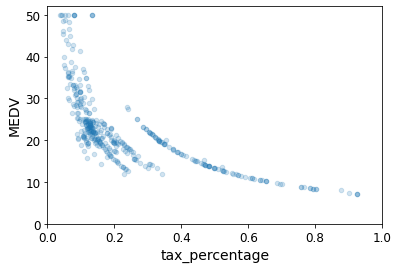

In [ ]:
housing.plot(kind="scatter", x="tax_percentage", y="MEDV",
             alpha=0.2)
plt.axis([0, 1, 0, 52])
plt.show()

In [ ]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B1000(BK0.63)^2,LSTAT%,MEDV,total_land,cost_per_room,tax_percentage
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.604118,10.937411,6.019505,0.074257,0.556997,6.295260,69.019802,3.694299,4.356436,409.443069,18.474505,358.813713,12.986906,22.268317,16.956916,3.467576,0.244760
std,8.642486,23.169894,2.698286,0.262514,0.116758,0.685974,28.521449,1.957909,1.411292,170.247883,2.147402,88.359651,7.261254,9.269539,22.143334,1.133432,0.213767
min,0.009060,0.000000,0.010000,0.000000,0.389000,4.138000,2.900000,0.585700,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.011000,0.879817,0.038600
25%,0.086963,0.000000,3.890000,0.000000,0.453000,5.887750,44.675000,2.060800,4.000000,283.250000,17.375000,376.092500,7.137500,16.575000,6.200000,2.798477,0.114224
50%,0.289575,0.001000,6.910000,0.000000,0.538000,6.205000,79.050000,3.107300,4.000000,330.000000,19.100000,391.440000,12.030000,20.800000,8.101000,3.442815,0.156701
75%,3.681942,12.500000,8.100000,0.000000,0.625750,6.604500,94.425000,5.116700,5.000000,666.000000,20.200000,396.352500,17.272500,24.850000,18.570000,3.983210,0.305924
max,88.976200,95.000000,9.900000,1.000000,0.871000,8.780000,100.000000,9.220300,8.000000,711.000000,22.000000,396.900000,37.970000,50.000000,97.680000,8.043758,1.332000


# Step 4. Prepare the data for Machine Learning algorithms (aka Data Cleaning)

In [ ]:
# Create the features and labels for training
housing = strat_train_set.drop("MEDV", axis=1) # drop labels for training set
housing_labels = strat_train_set["MEDV"].copy()

In [ ]:
# Check to see if there's any missing value in the data with .isnull()
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B1000(BK0.63)^2,LSTAT%


In [ ]:
sample_incomplete_rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B1000(BK0.63)^2,LSTAT%


So far we have dealt with numerical features, now let's preprocess the categorical input feature, `ocean_proximity`:

**Writing Custom Transformer:** Although Scikit-Learn provides many useful transformers, you will need to write your own for tasks such as custom cleanup operations or combining specific attributes. You will want your transformer to work seamlessly with Scikit-Learn functionalities (such as pipelines), and since Scikit-Learn relies on duck typing (not inheritance), all you need is to create a class and implement three methods: fit() (returning self), transform(), and fit_transform(). You can get the last one for free by simply adding TransformerMixin as a base class.

Also, if you add BaseEstimator as a base class (and avoid *args and **kargs in your constructor), you will get two extra methods (get_params() and set_params()) that will be useful for automatic hyperparameter tuning.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

MEDV_ix, TAX_ix, RM_ix = 3, 4, 5

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, cost_per_room = True): # no *args or **kargs
        self.cost_per_room = cost_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        cost_per_room = X[:, MEDV_ix] / X[:, RM_ix]
        tax_percentage = X[:, TAX_ix] / X[:, MEDV_ix]
        
        return np.c_[X, cost_per_room, tax_percentage]

# When set to false, that feature will not be added --> so here it adds two features only
attr_adder = CombinedAttributesAdder(cost_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


As you can see, there are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with such sequences of transformations. Now let's build a pipeline for preprocessing the numerical attributes:

**A note on StandardScaler:** Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Standardization subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance.

In [ ]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
np.isfinite(housing).all()
np.isnan(housing).any()

CRIM               False
ZN                 False
INDUS              False
CHAS               False
NOX                False
RM                 False
AGE                False
DIS                False
RAD                False
TAX                False
PTRATIO            False
B1000(BK0.63)^2    False
LSTAT%             False
dtype: bool

In [ ]:
housing.round(decimals=3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B1000(BK0.63)^2,LSTAT%
488,0.151,0.002,7.74,0,0.609,5.454,92.7,1.821,4,711.0,20.1,395.09,18.06
148,2.331,0.001,9.58,0,0.871,5.186,93.8,1.530,5,403.0,14.7,356.99,28.32
12,0.094,12.500,7.87,0,0.524,5.889,39.0,5.451,5,311.0,15.2,390.50,15.71
329,0.067,0.000,3.24,0,0.460,6.333,17.2,5.215,4,430.0,16.9,375.21,7.34
45,0.171,0.000,6.91,0,0.448,5.682,33.8,5.100,3,233.0,17.9,396.90,10.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,4.669,0.001,8.10,0,0.713,5.976,87.9,2.581,4,666.0,20.2,10.48,19.01
277,0.061,40.000,6.41,1,0.447,6.826,27.6,4.863,4,254.0,17.6,393.45,4.16
92,0.042,28.001,5.04,0,0.464,6.442,53.6,3.666,4,270.0,18.2,395.01,8.16
183,0.100,0.000,2.46,0,0.488,6.563,95.6,2.847,3,193.0,17.8,396.90,5.68


In [ ]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B1000(BK0.63)^2,LSTAT%
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.604118,10.937411,6.019505,0.074257,0.556997,6.295260,69.019802,3.694299,4.356436,409.443069,18.474505,358.813713,12.986906
std,8.642486,23.169894,2.698286,0.262514,0.116758,0.685974,28.521449,1.957909,1.411292,170.247883,2.147402,88.359651,7.261254
min,0.009060,0.000000,0.010000,0.000000,0.389000,4.138000,2.900000,0.585700,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.086963,0.000000,3.890000,0.000000,0.453000,5.887750,44.675000,2.060800,4.000000,283.250000,17.375000,376.092500,7.137500
50%,0.289575,0.001000,6.910000,0.000000,0.538000,6.205000,79.050000,3.107300,4.000000,330.000000,19.100000,391.440000,12.030000
75%,3.681942,12.500000,8.100000,0.000000,0.625750,6.604500,94.425000,5.116700,5.000000,666.000000,20.200000,396.352500,17.272500
max,88.976200,95.000000,9.900000,1.000000,0.871000,8.780000,100.000000,9.220300,8.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

#housing_num_tr = num_pipeline.fit_transform(housing)

#Dont need to store housing_num_tr because we are create another pipeline
#and do not want to transform twice.

In [ ]:
#housing_num_tr

So far, we have handled the categorical columns and the numerical columns separately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column. 

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 

num_attribs = list(housing.columns)
#cat_attribs = [""]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs)
        #("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
# housing_prepared
print(housing.shape)
print(housing_prepared.shape)

(404, 13)
(404, 13)


In [ ]:
housing_prepared

array([[-0.40006312, -0.47255158,  0.63841589, ...,  0.75789762,
         0.41106168,  0.69951891],
       [-0.14749306, -0.47259479,  1.32117591, ..., -1.75988744,
        -0.02066525,  2.11425003],
       [-0.40667589,  0.06752412,  0.68665437, ..., -1.5267592 ,
         0.35905049,  0.37548206],
       ...,
       [-0.41267117,  0.73736836, -0.36346023, ..., -0.12798972,
         0.41015517, -0.66557252],
       [-0.40594603, -0.472638  , -1.32080852, ..., -0.31449231,
         0.43157155, -1.00753482],
       [-0.38383936, -0.47255158, -1.5323157 , ...,  1.27077976,
         0.33162846,  1.54063585]])

# Step 5. Select and train a model 

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
# Note here that you only use transform() instead of fit_tranform becausue you are not trying to learn any parameter (ie. median)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [15.43212681 12.22795362 21.88107191 26.41723248 21.14781361]


Compare against the actual values:

In [ ]:
print("Labels:", list(some_labels))

Labels: [15.2, 17.8, 21.7, 22.6, 19.3]


In [ ]:
some_data_prepared

array([[-0.40006312, -0.47255158,  0.63841589, -0.28322059,  0.44594732,
        -1.22789369,  0.83128875, -0.95802293, -0.25287297,  1.77347779,
         0.75789762,  0.41106168,  0.69951891],
       [-0.14749306, -0.47259479,  1.32117591, -0.28322059,  2.69268603,
        -1.61906355,  0.86990404, -1.10698855,  0.4565762 , -0.03789215,
        -1.75988744, -0.02066525,  2.11425003],
       [-0.40667589,  0.06752412,  0.68665437, -0.28322059, -0.28295646,
        -0.59297248, -1.05383931,  0.89829426,  0.4565762 , -0.5789507 ,
        -1.5267592 ,  0.35905049,  0.37548206],
       [-0.40975057, -0.472638  , -1.03137764, -0.28322059, -0.83177813,
         0.05508503, -1.81912408,  0.77745465, -0.25287297,  0.12089677,
        -0.73412316,  0.18579314, -0.7786407 ],
       [-0.39768122, -0.472638  ,  0.33043175, -0.28322059, -0.93468219,
        -0.8951074 , -1.2363843 ,  0.71905481, -0.96232214, -1.03767426,
        -0.26786666,  0.43157155, -0.38290207]])

In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.38600581808717

OK, this is better than nothing but clearly not a great score: most districts’ median_housing_values range between \$120,000 and \$265,000, so a typical prediction error of $68,628 is not very satisfying. This is an example of a model underfitting the training data. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough.

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

3.081319256687493

Let’s train a DecisionTreeRegressor. This is a powerful model, capable of finding complex nonlinear relationships in the data (Decision Trees are presented in more detail in Chapter 6). The code should look familiar by now:

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

**Wait, what!?** No error at all? Could this model really be absolutely perfect? Of course, it is much more likely that the model has badly overfit the data. How can you be sure? As we saw earlier, you don’t want to touch the test set until you are ready to launch a model you are confident about, so you need to use part of the training set for training and part of it for model validation.

A great alternative is to use Scikit-Learn’s K-fold cross-validation feature. The following code randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

**Note:** Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes -scores before calculating the square root

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [4.00438784 5.32467794 2.6009848  4.09708403 4.96235831 3.47807418
 5.75471546 5.11302259 8.98461184 7.1754965 ]
Mean: 5.149541348933861
Standard deviation: 1.7593614052141247


Let’s compute the same scores for the Linear Regression model just to be sure

In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [4.5161078  4.70404641 3.81251657 4.03182357 3.75262773 2.82824446
 5.53961839 5.03027169 5.22305223 5.61526439]
Mean: 4.505357322322988
Standard deviation: 0.8494336665812403


Let’s try one last model now: the RandomForestRegressor. As we will see in Chapter 7, Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. Building a model on top of many other models is called Ensemble Learning, and it is often a great way to push ML algorithms even further. We will skip most of the code since it is essentially the same as for the other models:

**Note**: we specify `n_estimators=100` to be future-proof since the default value is going to change to 100 in Scikit-Learn 0.22 (for simplicity, this is not shown in the book).

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.4477686364721654

Wow, this is much better: Random Forests look very promising. However, note that the score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [3.65633243 4.24251128 2.46667151 3.12905222 2.58900086 2.34163429
 5.11376816 3.85886385 3.75699037 4.44696357]
Mean: 3.5601788535979724
Standard deviation: 0.8724943240942923


In [ ]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      4.505357
std       0.895382
min       2.828244
25%       3.867343
50%       4.610077
75%       5.174857
max       5.615264
dtype: float64

# Step 6. Fine tune your model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of 90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

The best hyperparameter combination found:

In [ ]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [ ]:
cvres = grid_search.cv_results_
# zip() is to combine the column "mean_test_score" with struct "params"
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.748547359279427 {'max_features': 2, 'n_estimators': 3}
3.909268885499666 {'max_features': 2, 'n_estimators': 10}
3.57970693379003 {'max_features': 2, 'n_estimators': 30}
4.562739017923226 {'max_features': 4, 'n_estimators': 3}
3.597814468191886 {'max_features': 4, 'n_estimators': 10}
3.4937649762384813 {'max_features': 4, 'n_estimators': 30}
4.482698472651023 {'max_features': 6, 'n_estimators': 3}
3.694047319925917 {'max_features': 6, 'n_estimators': 10}
3.4337245520546227 {'max_features': 6, 'n_estimators': 30}
4.410270086507134 {'max_features': 8, 'n_estimators': 3}
3.711151795768339 {'max_features': 8, 'n_estimators': 10}
3.5527710309881013 {'max_features': 8, 'n_estimators': 30}
4.338982907092215 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.39386158707485 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
4.130620226647583 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.3766245536842274 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [ ]:
# View the research results in table format
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006865,0.001998,0.001033,0.000179,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-26.673923,-12.608916,-17.043690,-36.741550,-19.675431,-22.548702,8.435811,18,-5.518944e+00,-9.197898e+00,-8.399102e+00,-7.297819e+00,-5.971646e+00,-7.277082e+00,1.396002e+00
1,0.015931,0.000299,0.001475,0.000036,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-21.401243,-7.284138,-7.385938,-25.338593,-15.002004,-15.282383,7.279728,12,-3.253100e+00,-4.547672e+00,-4.063580e+00,-3.052389e+00,-2.864595e+00,-3.556267e+00,6.425674e-01
2,0.046112,0.001515,0.002742,0.000040,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-18.157518,-7.017485,-5.353716,-21.562666,-11.980124,-12.814302,6.245688,7,-2.268374e+00,-2.576066e+00,-2.777483e+00,-2.137403e+00,-2.199638e+00,-2.391793e+00,2.447788e-01
3,0.006234,0.000188,0.000984,0.000022,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-23.341056,-10.979232,-17.850384,-30.008834,-21.913431,-20.818587,6.287214,17,-5.578555e+00,-8.732996e+00,-7.766897e+00,-5.461376e+00,-6.636598e+00,-6.835285e+00,1.262987e+00
4,0.018699,0.000810,0.001752,0.000332,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-16.661581,-6.328389,-6.962799,-20.388852,-14.379724,-12.944269,5.492697,8,-2.583480e+00,-3.769630e+00,-3.360349e+00,-2.526548e+00,-3.007471e+00,-3.049496e+00,4.706664e-01
5,0.050317,0.000962,0.002687,0.000039,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-16.660670,-4.990274,-5.483509,-21.293162,-12.604352,-12.206394,6.321991,5,-2.073279e+00,-2.324226e+00,-2.057546e+00,-1.824437e+00,-2.126181e+00,-2.081134e+00,1.597713e-01
6,0.006766,0.000205,0.001038,0.000118,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-23.117517,-10.079863,-14.719342,-26.459040,-26.097167,-20.094586,6.555353,16,-3.827798e+00,-4.843908e+00,-7.288256e+00,-6.214995e+00,-9.291149e+00,-6.293221e+00,1.905917e+00
7,0.020003,0.000492,0.001459,0.000077,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-17.542678,-6.724937,-9.178623,-19.163921,-15.619769,-13.645986,4.845325,9,-2.762706e+00,-2.812850e+00,-3.396482e+00,-2.488704e+00,-3.110445e+00,-2.914237e+00,3.115691e-01
8,0.058118,0.001781,0.002785,0.000068,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-15.238583,-5.636987,-6.068242,-18.244781,-13.763730,-11.790464,5.060645,4,-2.030894e+00,-2.258341e+00,-2.398735e+00,-1.887427e+00,-1.930322e+00,-2.101144e+00,1.965002e-01
9,0.007288,0.000176,0.000954,0.000053,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-22.863992,-14.222524,-13.140110,-23.113813,-23.911972,-19.450482,4.735595,15,-4.924537e+00,-6.087929e+00,-6.750568e+00,-4.054025e+00,-5.313597e+00,-5.426131e+00,9.315626e-01


The grid search approach is fine when you are exploring relatively few combinations, like in the previous example, but when the hyperparameter search space is large, it is often preferable to use RandomizedSearchCV instead. This class can be used in much the same way as the GridSearchCV class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3.439478893137255 {'max_features': 7, 'n_estimators': 180}
3.4113513403163545 {'max_features': 5, 'n_estimators': 15}
3.4134431708986583 {'max_features': 3, 'n_estimators': 72}
3.406254519830759 {'max_features': 5, 'n_estimators': 21}
3.4579003567780613 {'max_features': 7, 'n_estimators': 122}
3.4071177879009404 {'max_features': 3, 'n_estimators': 75}
3.4260849135505964 {'max_features': 3, 'n_estimators': 88}
3.3766217834390413 {'max_features': 5, 'n_estimators': 100}
3.3839186887459167 {'max_features': 3, 'n_estimators': 150}
4.4583463395448915 {'max_features': 5, 'n_estimators': 2}


You will often gain good insights on the problem by inspecting the best models. For example, the RandomForestRegressor can indicate the relative importance of each attribute for making accurate predictions:

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.1028997 , 0.02709673, 0.01272348, 0.00192676, 0.08506018,
       0.27580029, 0.03112676, 0.06110624, 0.00509226, 0.02834636,
       0.06121261, 0.0182915 , 0.28931714])

Let’s display these importance scores next to their corresponding attribute names:



In [ ]:
extra_attribs = ["total_lland", "tax_perc", "cost_per_rroom"]
attributes = num_attribs + extra_attribs 
sorted(zip(feature_importances, attributes), reverse=True)

[(0.28931714364349864, 'LSTAT%'),
 (0.275800289102247, 'RM'),
 (0.1028997040412826, 'CRIM'),
 (0.08506018460006808, 'NOX'),
 (0.06121260774393883, 'PTRATIO'),
 (0.061106235088923426, 'DIS'),
 (0.03112675848151803, 'AGE'),
 (0.0283463596328018, 'TAX'),
 (0.02709672590015387, 'ZN'),
 (0.018291499463887695, 'B1000(BK0.63)^2'),
 (0.012723475889952724, 'INDUS'),
 (0.005092257271529329, 'RAD'),
 (0.0019267591401981362, 'CHAS')]

After tweaking your models for a while, you eventually have a system that performs sufficiently well. Now is the time to evaluate the final model on the test set. 

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

4.263119197737455

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, final_predictions)
lin_mae

2.5157843137254896

We can compute a 95% confidence interval for the test RMSE:

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([1.94518303, 5.70654305])

# Step 7. Present your solution (see the slides)

In **step 1**, I went through to set up the enviroment we are going to work in, create the image folder incase we wanted to use that later.

In **step 2**, we create the datasets/housing folders but since kaggle requires login, we cant fetch the data in feel time. So you must insert the housing.csv file in to the housing folder after it gets created.
We later go on to what our dat looks like and use some visualization tool to mainly vidualize the distance from a job center

In **step 3**, we created graphs to show how the median house value can be affected depending on the values of other attributes. For example we saw that based on our data set, home values increase as the LSTAT% decreases and number of rooms increase. We makes sense. Then we visualize the relations between LSTAT% and medv; then tax% and medv. Step 3 is a good way to understand the data.

In **step 4**, we organize our data in medv as our label and everything else as the features. Then we check to see if there are any null values. we did not have any. We then represent the categories as numerical values but we dont have any string catagorical values.I then go some errors with values being too high so I checked for infinity and my largest value. I then created a pipeline to ensure our attributes we either numerical or catagorical. 

In **step 5**, we train the model on the train set, not the test set just yet. We also measure our mean square error to determine how cost effective our algorithm is.

In step 6, we use different machine learning algorithms to minimize the cost of our algorithm. we want achieve the lowest mean square error in these algorithms, and we can see this by testing out different algorithms.

# Step 8. Launch, maintain, and update (see the slides)